In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
from exp.nb_07a import *

In [3]:
URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz'

# Image ItemList

## Get images

In [18]:
untar_data??

Signature:
untar_data(
    url,
    fname=None,
    dest=None,
    c_key='data',
    force_download=False,
    extract_func=<function file_extract at 0x7fd0672f2160>,
    timeout=4,
)
Source:   
def untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=file_extract, timeout=4):
    "Download `url` to `fname` if `dest` doesn't exist, and un-tgz or unzip to folder `dest`."
    default_dest = URLs.path(url, c_key=c_key).with_suffix('')
    dest = default_dest if dest is None else Path(dest)/default_dest.name
    fname = Path(fname or URLs.path(url))
    if fname.exists() and _get_check(url) and _check_file(fname) != _get_check(url):
        print("A new version of this dataset is available, downloading...")
        force_download = True
    if force_download:
        if fname.exists(): os.remove(fname)
        if dest.exists(): shutil.rmtree(dest)
    if not dest.exists(): _try_from_storage(dest, URLs.path(url, c_key='storage').with_suffix(''))
    if not

In [19]:
download_data??

Signature:
download_data(
    url,
    fname=None,
    c_key='archive',
    force_download=False,
    timeout=4,
)
Source:   
def download_data(url, fname=None, c_key='archive', force_download=False, timeout=4):
    "Download `url` to `fname`."
    fname = Path(fname or URLs.path(url, c_key=c_key))
    fname.parent.mkdir(parents=True, exist_ok=True)
    if not fname.exists() or force_download: download_url(url, fname, overwrite=force_download, timeout=timeout)
    return fname
File:      ~/anaconda3/envs/fastbook/lib/python3.8/site-packages/fastai/data/external.py
Type:      function


In [20]:
download_url??

Signature:
download_url(
    url,
    dest,
    overwrite=False,
    pbar=None,
    show_progress=True,
    chunk_size=1048576,
    timeout=4,
    retries=5,
)
Source:   
def download_url(url, dest, overwrite=False, pbar=None, show_progress=True, chunk_size=1024*1024,
                 timeout=4, retries=5):
    "Download `url` to `dest` unless it exists and not `overwrite`"
    if os.path.exists(dest) and not overwrite: return

    s = requests.Session()
    s.mount('http://',requests.adapters.HTTPAdapter(max_retries=retries))
    # additional line to identify as a firefox browser, see fastai/#2438
    s.headers.update({'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'})
    u = s.get(url, stream=True, timeout=timeout)
    try: file_size = int(u.headers["Content-Length"])
    except: show_progress = False

    with open(dest, 'wb') as f:
        nbytes = 0
        if show_progress: pbar = progress_bar(range(file_size), leave=False, parent=pbar

In [4]:
path = untar_data(URLs.IMAGENETTE_160)
path

Path('/home/sandmann/.fastai/data/imagenette2-160')

In [8]:
#export
import PIL, os, mimetypes
Path.ls = lambda x: list(x.iterdir())

In [9]:
path.ls()

[Path('/home/sandmann/.fastai/data/imagenette2-160/noisy_imagenette.csv'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/.DS_Store'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/train')]

In [10]:
(path/'val').ls()

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03000684'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03394916'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n02979186'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03417042'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03028079'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n02102040'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03425413'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03445777')]

In [16]:
path_tench = (path/'val'/'n01440764')

In [17]:
img_fn = path_tench.ls()[0]
img_fn

Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_17050.JPEG')

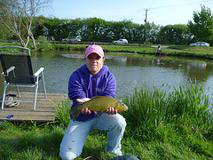

In [21]:
img = PIL.Image.open(img_fn)
img

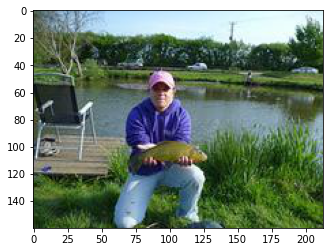

In [23]:
plt.imshow(img);

In [24]:
import numpy
imga = numpy.array(img)

In [25]:
imga.shape

(160, 213, 3)

In [27]:
imga[:5,:5,0]

array([[98, 93, 68, 79, 86],
       [86, 94, 81, 88, 82],
       [71, 80, 80, 88, 84],
       [62, 61, 64, 77, 86],
       [66, 58, 63, 70, 79]], dtype=uint8)

In [34]:
# mimetypes.types_map.items()

In [31]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [32]:
' '.join(image_extensions)

'.djv .erf .ppm .pat .jpf .gif .pgm .cdt .svg .cpt .crw .jpx .jpg .jpe .svgz .jpg2 .cdr .jpeg .wbmp .tif .nef .png .bmp .tiff .xbm .xpm .orf .ico .jpm .psd .ras .pbm .jng .ief .jp2 .art .pnm .pcx .djvu .xwd .rgb .cr2'

In [35]:
#export
def setify(o): return o if isinstance(o, set) else set(listify(o))

In [36]:
test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [39]:
#export
def _get_files(path, files, extensions=None):
    p = Path(path)
    res = [p/f for f in files if not f.startswith('.') and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [47]:
t = [o.name for o in os.scandir(path_tench)]
t[:3]

['n01440764_17050.JPEG', 'n01440764_8030.JPEG', 'n01440764_12131.JPEG']

In [48]:
t_path = _get_files(path_tench, t, image_extensions)
t_path[:3]

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_17050.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_8030.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_12131.JPEG')]

In [54]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i, (p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filesnames)
            if include is not None and i == 0:
                d[:] = [o for o in d if o in include]
            else:
                 d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
        
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [55]:
get_files(path_tench, image_extensions)[:3]

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_17050.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_8030.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_12131.JPEG')]

In [56]:
get_files(path, image_extensions, recurse=True)[:3]

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_24470.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_6912.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_23801.JPEG')]

In [57]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

In [58]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

49.4 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Prepare for modeling

## Get files

In [ ]:
#export
def compose